In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../measurement_data/dut_plus_fixture.csv")

### Return Loss ($RL$)

Return Loss is a measure of the power reflected back toward the source due to an impedance mismatch in a transmission line or optical fiber. It is the ratio of incident power to reflected power, typically expressed in decibels (dB). In RF engineering, it is derived from the reflection coefficient, $S_{11}$.

\begin{equation}
S_{11} = \frac{incident}{reflected}
\end{equation}

## 1. Magnitude of $S_{11}$
Given the real and imaginary components from the dataset ($S_{11} = \text{Re} + j\text{Im}$), the magnitude $|S_{11}|$ is calculated as:

\begin{equation}
|S_{11}| = \sqrt{S_{11,real}^2 + S_{11,imag}^2}
\end{equation}

## 2. Return Loss Calculation (dB)
Return Loss is defined as the negative magnitude of the reflection coefficient in decibels:

\begin{equation}
RL(\text{dB}) = -20 \log_{10}(|S_{11}|)
\end{equation}

Note: In practice, while $S_{11}$ is mathematically negative, Return Loss is often expressed as a positive scalar representing the magnitude of that "loss."} *

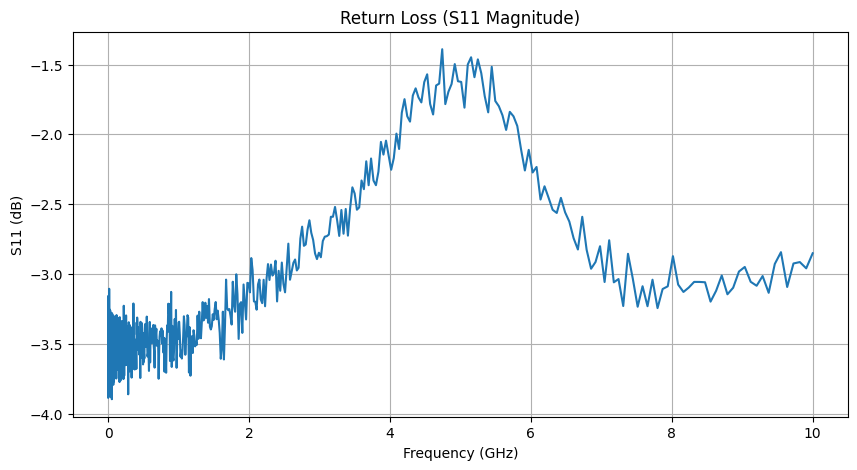

In [12]:
### Lets plot the S11 magnitude in dB vs frequency in GHz

# 1. Extract frequency and calculate magnitude
frequencies = df["frequency_Hz"].values
S11_mag = np.sqrt(df["S11_real"]**2 + df["S11_imag"]**2)

# 2. Convert to decibels (dB)
S11_mag_db = 20 * np.log10(S11_mag)

# 3. Plotting (divide by 1e9 to convert Hz to GHz for the x-axis)
plt.figure(figsize=(10, 5))
plt.plot(frequencies / 1e9, S11_mag_db) 

plt.title("Return Loss (S11 Magnitude)")
plt.ylabel("S11 (dB)")
plt.xlabel("Frequency (GHz)")
plt.grid(True)
plt.show()

### Forward Transmission ($S_{21}$)
The Forward Transmission Coefficient ($S_{21}$) represents the ratio of the signal coming out of Port 2 to the signal injected into Port 1. In passive systems (like cables or filters), it measures Insertion Loss, while in active systems (like amplifiers), it measures Gain.1. Magnitude of ($S_{21}$) Using the real and imaginary components from the dataset ($S_{21} = \text{Re} + j\text{Im}$), the linear magnitude ($S_{21}$) is calculated as:$$|S_{21}| = \sqrt{S_{21,real}^2 + S_{21,imag}^2}$$2. Transmission / Gain Calculation (dB)To analyze the transmission on a logarithmic scale, we convert the linear magnitude to decibels:$$S_{21}(\text{dB}) = 20 \log_{10}(|S_{21}|)$$3. Physical Significance0 dB: Indicates perfect transmission where 100% of the power reaches the output.Negative dB (e.g., -3 dB): Indicates Insertion Loss. A value of -3 dB means approximately 50% of the power was lost or absorbed by the device.Positive dB (e.g., +15 dB): Indicates Gain, meaning the device is an amplifier increasing the signal strength.

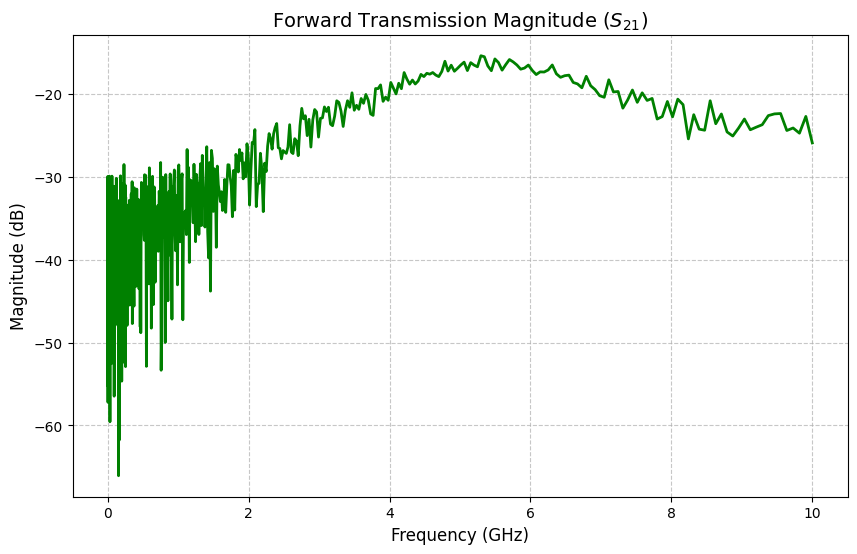

In [13]:
s21_real = df["S21_real"].values
s21_imag = df["S21_imag"].values

# 3. Calculate linear magnitude
# |S21| = sqrt(Re^2 + Im^2)
s21_mag = np.sqrt(s21_real**2 + s21_imag**2)

# 4. Convert to decibels (dB)
# S21(dB) = 20 * log10(|S21|)
s21_db = 20 * np.log10(s21_mag)

# 5. Create the plot
plt.figure(figsize=(10, 6))

# Converting x-axis to GHz for better readability (Hz / 1e9)
plt.plot(frequencies / 1e9, s21_db, label="$S_{21}$ (Transmission)", color="green", linewidth=2)

# Add titles and labels
plt.title("Forward Transmission Magnitude ($S_{21}$)", fontsize=14)
plt.xlabel("Frequency (GHz)", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)

### Reverse Transmission ($S_{12}$)

The Reverse Transmission Coefficient ($S_{12}$) represents the ratio of the signal coming out of Port 1 to the signal injected into Port 2. It is the reverse path counterpart to $S_{21}$ and measures signal leakage or transmission in the opposite direction.

## 1. Magnitude of $S_{12}$
Given the real and imaginary components from the dataset ($S_{12} = \text{Re} + j\text{Im}$), the linear magnitude $|S_{12}|$ is calculated as:

$$|S_{12}| = \sqrt{S_{12,real}^2 + S_{12,imag}^2}$$

## 2. Transmission Calculation (dB)
To analyze the reverse transmission on a logarithmic scale, we convert the linear magnitude to decibels:

$$S_{12}(\text{dB}) = 20 \log_{10}(|S_{12}|)$$

## 3. Physical Significance
For reciprocal networks (passive, linear devices), $S_{12}$ typically equals $S_{21}$. In non-reciprocal systems (isolators, circulators), they differ significantly. Negative dB values indicate insertion loss in the reverse direction.

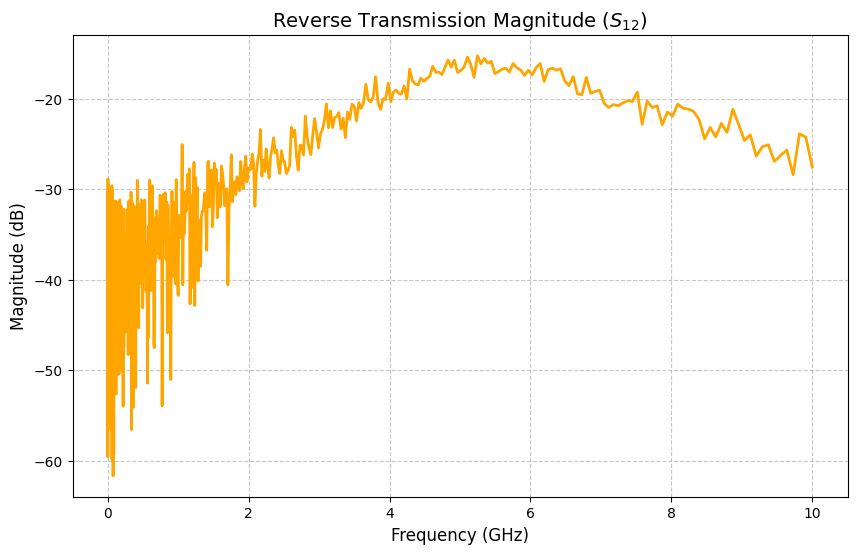

In [14]:
s12_real = df["S12_real"].values
s12_imag = df["S12_imag"].values

# 3. Calculate linear magnitude
# |S12| = sqrt(Re^2 + Im^2)
s12_mag = np.sqrt(s12_real**2 + s12_imag**2)

# 4. Convert to decibels (dB)
# S12(dB) = 20 * log10(|S12|)
s12_db = 20 * np.log10(s12_mag)

# 5. Create the plot
plt.figure(figsize=(10, 6))

# Converting x-axis to GHz for better readability (Hz / 1e9)
plt.plot(frequencies / 1e9, s12_db, label="$S_{12}$ (Reverse Transmission)", color="orange", linewidth=2)

# Add titles and labels
plt.title("Reverse Transmission Magnitude ($S_{12}$)", fontsize=14)
plt.xlabel("Frequency (GHz)", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()

### Return Loss at Port 2 ($S_{22}$)

The Return Loss at Port 2 ($S_{22}$) is the reflection coefficient measured at Port 2 when Port 1 is the signal source. It represents the ratio of reflected power to incident power at Port 2, expressed in decibels (dB). Similar to $S_{11}$, it indicates impedance mismatch at Port 2.

## 1. Magnitude of $S_{22}$
Given the real and imaginary components from the dataset ($S_{22} = \text{Re} + j\text{Im}$), the magnitude $|S_{22}|$ is calculated as:

$$|S_{22}| = \sqrt{S_{22,real}^2 + S_{22,imag}^2}$$

## 2. Return Loss Calculation (dB)
Return Loss at Port 2 is defined as the negative magnitude of the reflection coefficient in decibels:

$$RL_{22}(\text{dB}) = -20 \log_{10}(|S_{22}|)$$

Note: In practice, Return Loss is often expressed as a positive scalar representing the magnitude of the reflected power loss.

## 3. Physical Significance
A higher Return Loss value (more negative dB) indicates better impedance matching at Port 2. A Return Loss of 20 dB means 99% of the incident power is transmitted forward, while only 1% is reflected back. Return Loss values below 10 dB typically indicate poor matching and potential signal reflections.

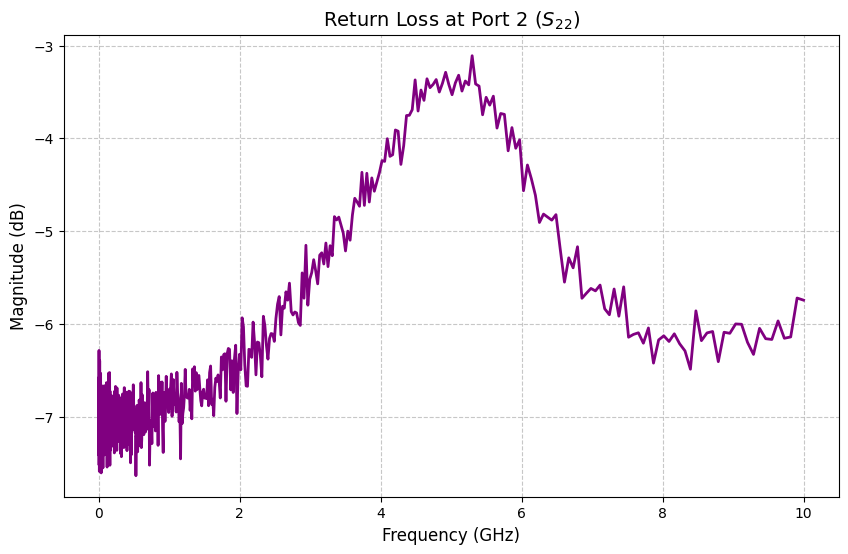

In [15]:
s22_real = df["S22_real"].values
s22_imag = df["S22_imag"].values

# 3. Calculate linear magnitude
# |S22| = sqrt(Re^2 + Im^2)
s22_mag = np.sqrt(s22_real**2 + s22_imag**2)

# 4. Convert to decibels (dB)
# S22(dB) = 20 * log10(|S22|)
s22_db = 20 * np.log10(s22_mag)

# 5. Create the plot
plt.figure(figsize=(10, 6))

# Converting x-axis to GHz for better readability (Hz / 1e9)
plt.plot(frequencies / 1e9, s22_db, label="$S_{22}$ (Return Loss)", color="purple", linewidth=2)

# Add titles and labels
plt.title("Return Loss at Port 2 ($S_{22}$)", fontsize=14)
plt.xlabel("Frequency (GHz)", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()